**Задание:** найти фрагмент изображения по шаблону

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Загружаем основное изображение и шаблон

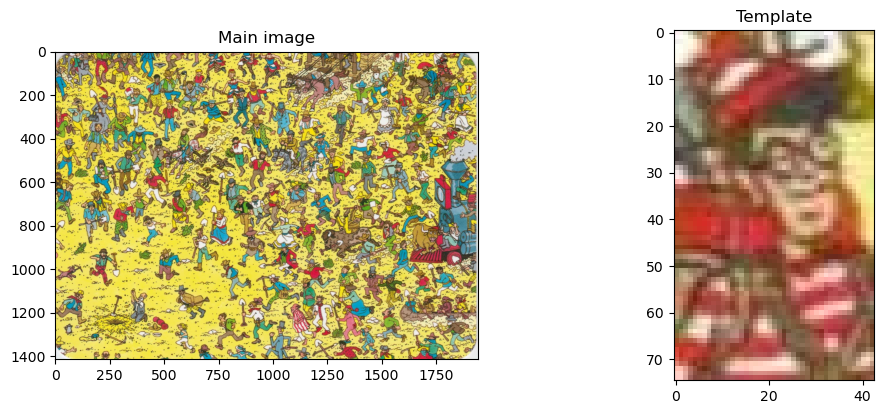

In [3]:
image = cv.imread("main_image.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
template = cv.imread("template.jpg")
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

gs = plt.GridSpec(2, 2)

plt.figure(figsize=(12, 10))
plt.subplot(gs[0])
plt.title("Main image")
plt.imshow(image)
plt.subplot(gs[1])
plt.title("Template")
plt.imshow(template)

Считаем размер шаблона

In [4]:
w, h = template.shape[:-1]
w, h

(75, 43)

Переводим в черно-белый формат

In [5]:
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gray_tmp = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

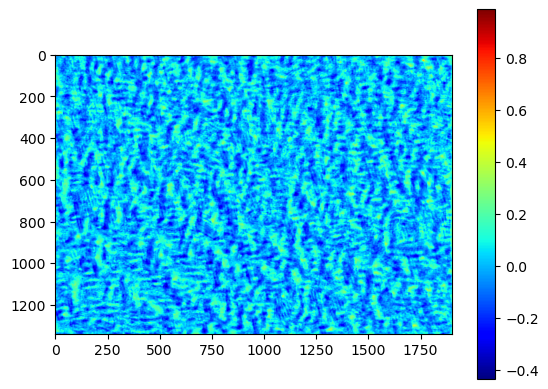

In [6]:
result = cv.matchTemplate(gray_img, gray_tmp, cv.TM_CCOEFF_NORMED)
plt.figure()
plt.imshow(result, cmap='jet')
plt.colorbar()

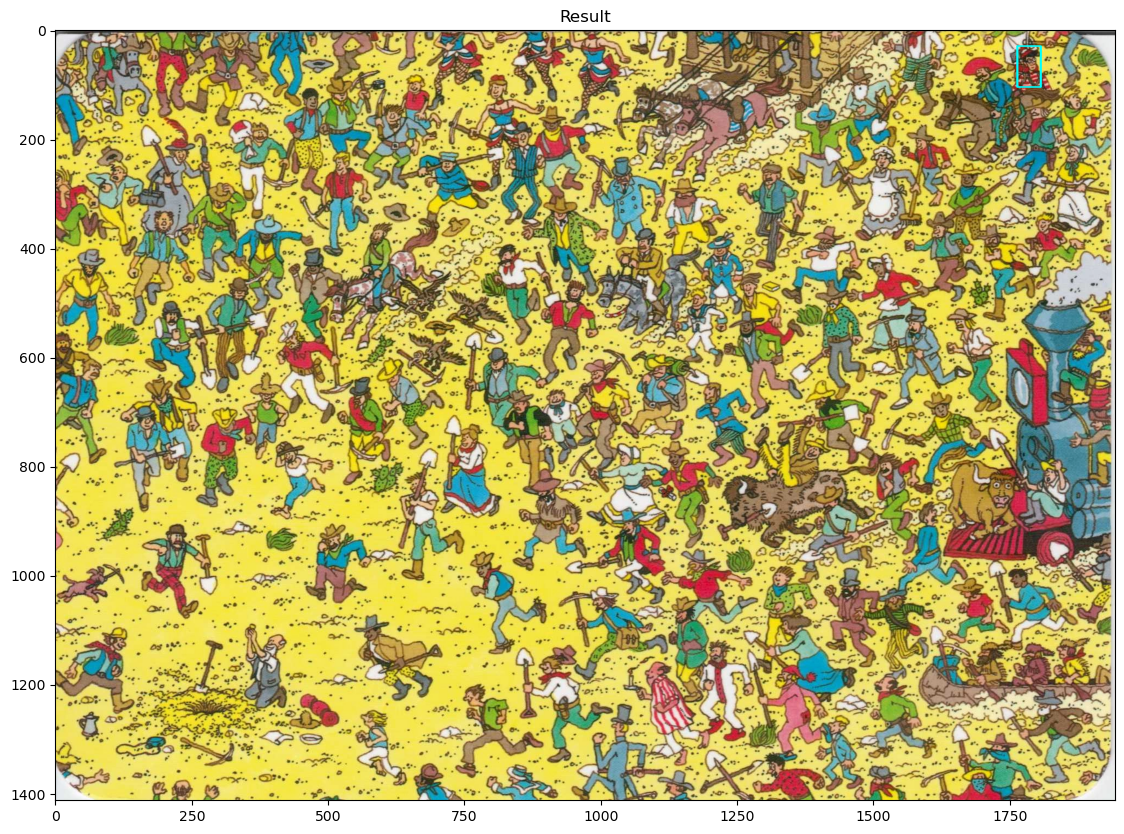

In [11]:
threshold = 0.9
loc = np.where(result >= threshold) 
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = image.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(plot_img, pt,(pt[0] + h, pt[1] + w),(0, 255, 255), 2)  

# Отображаем результат на графике
plt.figure(figsize=(15, 10))
plt.title("Result")
plt.imshow(plot_img)

Обнаружено одно совпадение в правом верхнем углу изображения